In [1]:
import sys
sys.path.append("..")

import torch
import numpy as np

from src.data import load_cora
from src.features.cora_feature import split
from src.models import train_cora
from src.models.gcn_simple import GCN

In [2]:
# reproducibility
random_seed = 123
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

## Load the Dataset

In [3]:
graph, num_inputs, num_outputs = load_cora.load()
graph

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

### Split the data into train, validation, and test

In [4]:
graph = split(graph)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
training samples 1895
validation samples 542
test samples 271


## Training & Result

Can run on GPU (cuda:0)

Pre-training prepare
	Run on: cuda:0
	Optimizer with 0.001 leraning rate and 0.0005 weight_dacay

Begin to train:
	Epoch: 1, Training Loss: 1.931372046470642, Validation Score: 0.3099631071090698, Test Score: 0.29520294070243835
	Epoch: 10, Training Loss: 1.675019383430481, Validation Score: 0.4040590524673462, Test Score: 0.41697415709495544
	Epoch: 20, Training Loss: 1.3764750957489014, Validation Score: 0.5959409475326538, Test Score: 0.6531365513801575
	Epoch: 30, Training Loss: 1.094862699508667, Validation Score: 0.7490774989128113, Test Score: 0.7933579087257385
	Epoch: 40, Training Loss: 0.8583698868751526, Validation Score: 0.8339483141899109, Test Score: 0.8487085103988647
	Epoch: 50, Training Loss: 0.6753106713294983, Validation Score: 0.8690037131309509, Test Score: 0.8671586513519287
	Epoch: 60, Training Loss: 0.5423449873924255, Validation Score: 0.88376384973526, Test Score: 0.8892989158630371
	Epoch: 70, Training Loss: 0.44915997982025146, Valid

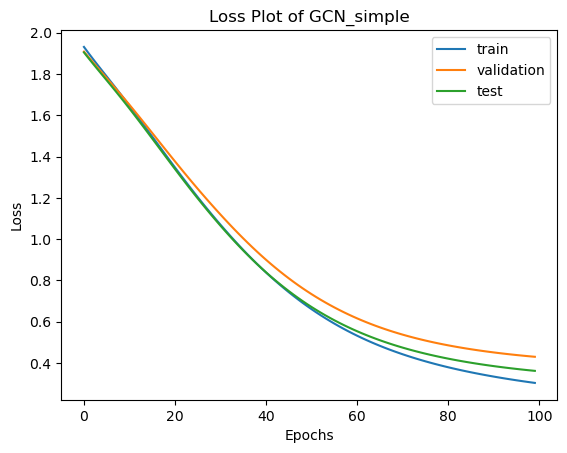

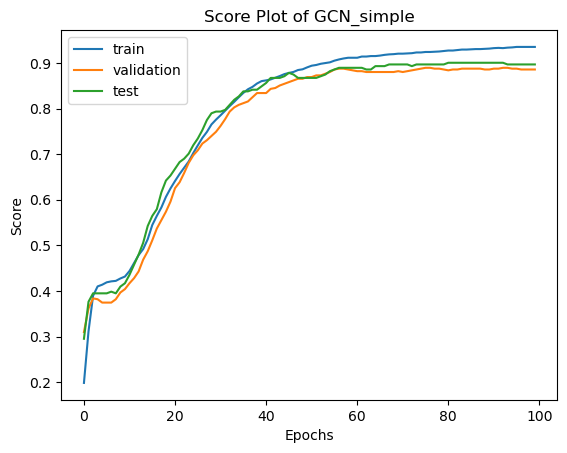

In [5]:
device = train_cora.GPU()
model = GCN(num_inputs=num_inputs, num_outputs=num_outputs)
criterion = torch.nn.CrossEntropyLoss()
train_cora.start_train(model, graph, criterion, model_name="GCN_simple", device=device)